In [29]:
##!pip uninstall pandas
##!pip install --upgrade pandas==0.23.0

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

In [31]:
data=pd.read_csv('diabetes.csv')

In [32]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [34]:
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

In [35]:
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [36]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

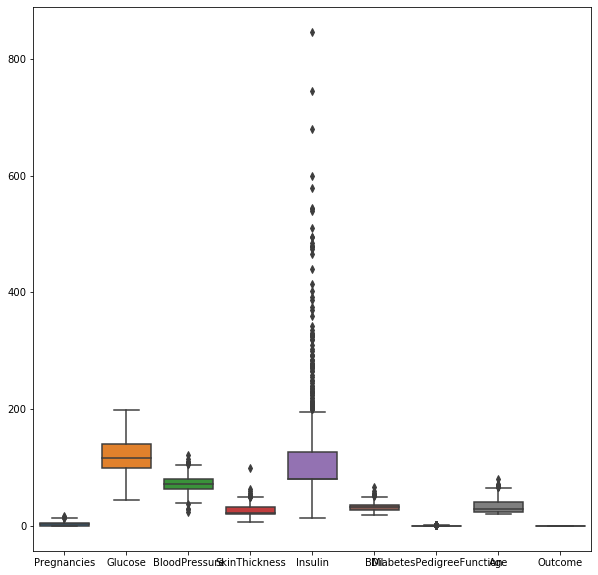

In [37]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=data,ax=ax)

In [38]:
q=data['Insulin'].quantile(0.70)
q

106.0

In [39]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [40]:
df_new=data[data['Insulin']<q]

In [41]:
q=data['Pregnancies'].quantile(0.98)
df_new=data[data['Pregnancies']<q]

In [42]:
q=df_new['BMI'].quantile(0.99)
df_new=df_new[df_new['BMI']<q]

In [43]:
q=df_new['SkinThickness'].quantile(0.99)
df_new=df_new[df_new['SkinThickness']<q]

In [44]:
q=df_new['Insulin'].quantile(0.95)
df_new=df_new[df_new['Insulin']<q]

In [45]:
q=df_new['DiabetesPedigreeFunction'].quantile(0.99)
df_new=df_new[df_new['DiabetesPedigreeFunction']<q]
q=df_new['Age'].quantile(0.99)
df_new=df_new[df_new['Age']<q]

In [46]:
scalar=StandardScaler()


In [50]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']
x.shape

(768, 8)

In [51]:
x_scaled=scalar.fit_transform(x)

In [52]:
x_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.8,random_state=0)

In [57]:
x_train

array([[-0.84488505,  1.68720632,  0.14413508, ...,  0.63298803,
        -1.15935199,  0.40494237],
       [ 0.3429808 , -0.54844485, -0.0210444 , ...,  0.64754217,
        -0.94492356, -0.44593516],
       [-0.25095213,  2.27899634, -0.35140338, ..., -0.2257064 ,
        -0.52210695,  0.06459135],
       ...,
       [ 0.04601433, -0.91009431, -0.59917261, ..., -1.12806325,
        -0.97814487, -1.04154944],
       [ 2.12477957, -1.20598931,  0.14413508, ..., -0.34213954,
        -0.51908683,  0.14967911],
       [ 0.3429808 ,  0.47074907,  0.80485303, ..., -0.06669102,
         0.50775352,  3.04266271]])

In [60]:
log=LogisticRegression(verbose=1,n_jobs=-1,solver='liblinear')
log.fit(x_train,y_train)

[LibLinear]

C:\Users\Mrunal Metkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [61]:
x_test[0]

array([-0.84488505,  2.54201413,  0.30931457,  1.70322854, -0.41776815,
        1.52079074,  2.784923  , -0.95646168])

In [62]:
log.predict([x_test[0]])

array([1], dtype=int64)

In [63]:
log.predict([x_test[4]])

array([0], dtype=int64)

In [64]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [68]:
log.predict(scalar.fit_transform([[6,148.0,72.0,35.000000,79.799479,33.6,0.627,50]]))

array([0], dtype=int64)

In [70]:
y_pred=log.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve


In [77]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [78]:
tn

359

In [79]:
accuracy=((tp+tn)/(tn+fp+fn+tp))

In [80]:
accuracy

0.775609756097561

In [81]:
precision=tp/(tp+fp)

In [82]:
precision

0.7612903225806451

In [83]:
recall=tp/(tp+fn)

In [84]:
recall

0.5388127853881278

In [88]:
log1=LogisticRegression()
log2=LogisticRegression(n_jobs=4,solver='saga')
log3=LogisticRegression(solver='sag')


In [89]:
##ROC- threshold
##AUC- Model selection